In [3]:
# import relevant libraries
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:
# insert dataset
dataset = pd.read_csv('real_estate_price_size.csv')
dataset.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


In [22]:
dataset.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [7]:
# define dependent & independent variables
x = dataset['size']
y = dataset['price']

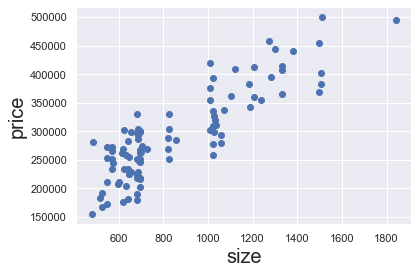

In [26]:
# explore dataset
plt.scatter(x,y)
plt.xlabel('size',fontsize=20)
plt.ylabel('price',fontsize=20)
plt.show()

In [9]:
# reshape variables into 2D array
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(100, 1)

In [10]:
# make linear regression
reg = LinearRegression().fit(x_matrix,y)

In [12]:
# reg R-squared
reg.score(x_matrix,y)

0.7447391865847586

In [13]:
# reg coefficient
reg.coef_

array([223.17874259])

In [14]:
# reg intercept
reg.intercept_

101912.60180122906

In [27]:
# make prediction
reg.predict([[750]])

array([269296.65874718])

In [18]:
# add new predict column into dataset
new_data = pd.DataFrame(data=dataset['size'])
dataset['predicted price'] = reg.predict(new_data)
dataset

,price,size,predicted price
0,234314.144,643.09,245436.619376
1,228581.528,656.22,248366.956267
2,281626.336,487.29,210665.371280
3,401255.608,1504.75,437740.814720
4,458674.256,1275.46,386568.160831
...,...,...,...
95,252460.400,549.80,224616.274480
96,310522.592,1037.44,333447.156519
97,383635.568,1504.75,437740.814720
98,225145.248,648.29,246597.148838


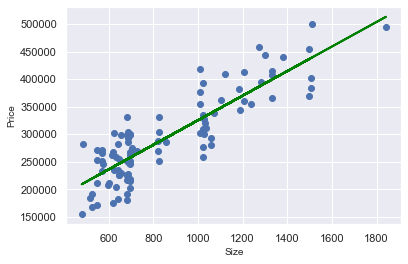

In [19]:
plt.scatter(x,y)
yhat = reg.intercept_ + (reg.coef_ * x_matrix)
fig = plt.plot(x,yhat, lw=2, c='green', label='regression line')
plt.xlabel('Size', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.show()